In [1]:
import os
import openai
import pandas as pd
import time

# OpenAI API ÌÇ§ ÏÑ§Ï†ï
openai.api_key = ""

# Îç∞Ïù¥ÌÑ∞ Ìè¥Îçî Í≤ΩÎ°ú
data_folder_path = "./Î±ÖÎ±ÖÎßâÍµ≠Ïàò_combined_reviews.csv""

# Ìè¥Îçî ÎÇ¥ Î™®Îì† CSV ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
file_list = [f for f in os.listdir(data_folder_path) if f.endswith('.csv')]

# ÌååÏùºÎßàÎã§ Í∞êÏÑ± Î∂ÑÏÑù ÏàòÌñâ
for file_name in file_list:
    review_file_path = os.path.join(data_folder_path, file_name)
    reviews_df = pd.read_csv(review_file_path)

    # Í∞êÏÑ± Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
    sentiments = []

    # Î¶¨Î∑∞ÎßàÎã§ Í∞êÏÑ± Î∂ÑÏÑù ÏàòÌñâ
    for review_text in reviews_df['Review']:  # Ïª¨ÎüºÎ™ÖÏù¥ 'Review'ÎùºÍ≥† Í∞ÄÏ†ï
        try:
            # ÏµúÏã† ChatCompletion Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú Í∞êÏÑ± Î∂ÑÏÑù
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo-1106",
                messages=[
                    {"role": "system", "content": "ÎãπÏã†ÏùÄ Í∞êÏÑ± Î∂ÑÏÑùÏùÑ Ï†ÑÎ¨∏ÏúºÎ°ú ÌïòÎäî ÎèÑÏõÄÎßê Ïñ¥ÏãúÏä§ÌÑ¥Ìä∏ÏûÖÎãàÎã§. Î¨∏Îß•Ïù¥ ÏóÜÎäî Îã®Ïñ¥(Ïòà: 'Ï¢ãÏïÑÏöî', 'Î≥ÑÎ°úÏòàÏöî')Îßå ÏûàÎäî Í≤ΩÏö∞, Îã®Ïñ¥Ïùò Í∞êÏÑ±Ïóê Îî∞Îùº 'Í∏çÏ†ïÏ†Å' ÎòêÎäî 'Î∂ÄÏ†ïÏ†Å'ÏúºÎ°ú ÏùëÎãµÌïòÏÑ∏Ïöî."},
                    {"role": "user", "content": f"Îã§Ïùå Î¶¨Î∑∞Ïùò Í∞êÏÑ±ÏùÑ Î∂ÑÏÑùÌïòÏó¨ 'Í∏çÏ†ïÏ†Å' ÎòêÎäî 'Î∂ÄÏ†ïÏ†Å' ÌòïÏãùÏúºÎ°úÎßå ÏùëÎãµÌï¥ Ï£ºÏÑ∏Ïöî: '{review_text}'"}
                ],
                max_tokens=20,  # ÏùëÎãµ Í∏∏Ïù¥Î•º Ï§ÑÏûÖÎãàÎã§.
                temperature=0.2
            )
            
            # API ÏùëÎãµÏóêÏÑú Í∞êÏÑ± Î∂ÑÏÑù Í≤∞Í≥º Ï∂îÏ∂ú
            response_text = response.choices[0].message['content'].strip()
            if "Í∏çÏ†ïÏ†Å" in response_text:
                sentiment = "Í∏çÏ†ïÏ†Å"
            elif "Î∂ÄÏ†ïÏ†Å" in response_text:
                sentiment = "Î∂ÄÏ†ïÏ†Å"
            else:
                sentiment = "Ïïå Ïàò ÏóÜÏùå"
            
            sentiments.append(sentiment)
            
        except Exception as e:
            print(f"Î¶¨Î∑∞ Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
            sentiments.append("Ïò§Î•ò")
            time.sleep(1)  # Ïò§Î•ò Î∞úÏÉù Ïãú Ïû†Ïãú ÎåÄÍ∏∞
        
        # ÏöîÏ≤≠ ÎπàÎèÑ Ï†úÏñ¥
        time.sleep(0.5)  # Í∞Å ÏöîÏ≤≠ ÏÇ¨Ïù¥Ïóê ÎåÄÍ∏∞ ÏãúÍ∞Ñ Ï∂îÍ∞Ä

    # Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
    reviews_df['sentiment'] = sentiments

    # ÏõêÎ≥∏ ÌååÏùº Ïù¥Î¶ÑÏóê "_Î∂ÑÏÑù" Ï∂îÍ∞ÄÌïòÏó¨ Ï†ÄÏû•
    #base_name = os.path.splitext(file_name)[0]
    #output_path = f"./data/{base_name}_Î∂ÑÏÑù.csv"
    #reviews_df.to_csv(output_path, index=False)
    print("Í∞êÏÑ± Î∂ÑÏÑù ÏôÑÎ£å")

NotADirectoryError: [WinError 267] ÎîîÎ†âÌÑ∞Î¶¨ Ïù¥Î¶ÑÏù¥ Ïò¨Î∞îÎ•¥ÏßÄ ÏïäÏäµÎãàÎã§: './ÌïúÍ∞ïÏàò_combined_reviews.csv'

In [1]:
import os
import openai
import pandas as pd
import time

# OpenAI API ÌÇ§ ÏÑ§Ï†ï
openai.api_key =
# Î∂ÑÏÑùÌï† ÌååÏùº Í≤ΩÎ°úÎ•º ÏßÅÏ†ë ÏßÄÏ†ï
review_file_path = "./Î±ÖÎ±ÖÎßâÍµ≠Ïàò_combined_reviews.csv"

# CSV ÌååÏùº ÏùΩÍ∏∞
reviews_df = pd.read_csv(review_file_path)

# Í∞êÏÑ± Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
sentiments = []

# Î¶¨Î∑∞ÎßàÎã§ Í∞êÏÑ± Î∂ÑÏÑù ÏàòÌñâ
for review_text in reviews_df['Review']:  # Ïª¨ÎüºÎ™ÖÏù¥ 'Review'ÎùºÍ≥† Í∞ÄÏ†ï
    try:
        # ÏµúÏã† ChatCompletion Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú Í∞êÏÑ± Î∂ÑÏÑù
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo-1106",
            messages=[
                {"role": "system", "content": "ÎãπÏã†ÏùÄ Í∞êÏÑ± Î∂ÑÏÑùÏùÑ Ï†ÑÎ¨∏ÏúºÎ°ú ÌïòÎäî ÎèÑÏõÄÎßê Ïñ¥ÏãúÏä§ÌÑ¥Ìä∏ÏûÖÎãàÎã§. Î¨∏Îß•Ïù¥ ÏóÜÎäî Îã®Ïñ¥(Ïòà: 'Ï¢ãÏïÑÏöî', 'Î≥ÑÎ°úÏòàÏöî')Îßå ÏûàÎäî Í≤ΩÏö∞, Îã®Ïñ¥Ïùò Í∞êÏÑ±Ïóê Îî∞Îùº 'Í∏çÏ†ïÏ†Å' ÎòêÎäî 'Î∂ÄÏ†ïÏ†Å'ÏúºÎ°ú ÏùëÎãµÌïòÏÑ∏Ïöî."},
                {"role": "user", "content": f"Îã§Ïùå Î¶¨Î∑∞Ïùò Í∞êÏÑ±ÏùÑ Î∂ÑÏÑùÌïòÏó¨ 'Í∏çÏ†ïÏ†Å' ÎòêÎäî 'Î∂ÄÏ†ïÏ†Å' ÌòïÏãùÏúºÎ°úÎßå ÏùëÎãµÌï¥ Ï£ºÏÑ∏Ïöî: '{review_text}'"}
            ],
            max_tokens=20,  # ÏùëÎãµ Í∏∏Ïù¥Î•º Ï§ÑÏûÖÎãàÎã§.
            temperature=0.2
        )
        
        # API ÏùëÎãµÏóêÏÑú Í∞êÏÑ± Î∂ÑÏÑù Í≤∞Í≥º Ï∂îÏ∂ú
        response_text = response.choices[0].message['content'].strip()
        if "Í∏çÏ†ïÏ†Å" in response_text:
            sentiment = "Í∏çÏ†ïÏ†Å"
        elif "Î∂ÄÏ†ïÏ†Å" in response_text:
            sentiment = "Î∂ÄÏ†ïÏ†Å"
        else:
            sentiment = "Ïïå Ïàò ÏóÜÏùå"
        
        sentiments.append(sentiment)
        
    except Exception as e:
        print(f"Î¶¨Î∑∞ Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        sentiments.append("Ïò§Î•ò")
        time.sleep(1)  # Ïò§Î•ò Î∞úÏÉù Ïãú Ïû†Ïãú ÎåÄÍ∏∞
    
    # ÏöîÏ≤≠ ÎπàÎèÑ Ï†úÏñ¥
    time.sleep(0.5)  # Í∞Å ÏöîÏ≤≠ ÏÇ¨Ïù¥Ïóê ÎåÄÍ∏∞ ÏãúÍ∞Ñ Ï∂îÍ∞Ä

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
reviews_df['sentiment'] = sentiments

# Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Í≤ΩÎ°ú ÏßÄÏ†ï
#output_path = "./ÌïúÍ∞ïÏàò_combined_reviews_Î∂ÑÏÑù.csv"
#reviews_df.to_csv(output_path, index=False)

print("Í∞êÏ†ï Î∂ÑÏÑù ÏôÑÎ£å")


Í∞êÏ†ï Î∂ÑÏÑù ÏôÑÎ£å


In [2]:
reviews_df.to_csv('Î±ÖÎ±ÖÎßâÍµ≠Ïàò_combined_reviews_Í∞êÏ†ïÎ∂ÑÏÑùÏôÑÎ£å', index=False, encoding='utf-8-sig')


In [3]:
data = pd.read_csv('./Î±ÖÎ±ÖÎßâÍµ≠Ïàò_combined_reviews_Í∞êÏ†ïÎ∂ÑÏÑùÏôÑÎ£å')
data

Date                                             Review sentiment
0        2Ï£º Ï†Ñ  ÎßâÍµ≠ÏàòÏùò ÎåÄÍ∞Äüåüüåüüåüüåüüåü\nÎ∞∞Í∞Ä ÏûëÏùÄÍ±∞Ïóê ÌïúÌÉÑÌïòÎ©∞ Î™®Îì† ÏùåÏãùÏùÑ Î®πÏßÄ Î™ªÌï¥ Ïä¨Ìîå Ï†ïÎèÑ....       Î∂ÄÏ†ïÏ†Å
1        3Îã¨ Ï†Ñ  Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò, Ï∞∏Í∏∞Î¶ÑÎßâÍµ≠Ïàò, ÏΩîÎã§Î¶¨ÎßâÍµ≠ÏàòÎ•º Î®πÏóàÎäîÎç∞ 3Í∞ú Î©îÎâ¥ Î™®Îëê ÎßõÏûàÏóàÏñ¥Ïöî. Íµ≠...       Í∏çÏ†ïÏ†Å
2        4Îã¨ Ï†Ñ  Ïú†Î™ÖÌïú Í≥≥Ïù¥Îùº ÏôÄÎ¥§ÎäîÎç∞ ÎßõÏûàÍ≥† ÏπúÏ†àÌïòÍ≥† Ïú†Î™ÖÌïú Ïù¥Ïú†Î•º ÏïåÍ≤†ÎÑ§Ïöî^-^\nÏΩîÎã§Î¶¨Îûë Ï∞∏Í∏∞...       Í∏çÏ†ïÏ†Å
3        4Îã¨ Ï†Ñ  Í∞ïÎÇ® Î±ÖÎ±ÖÏÇ¨Í±∞Î¶¨ÏóêÏÑú ÎßâÍµ≠ÏàòÎ°ú Ïú†Î™ÖÌïú ÎßõÏßëÏûÖÎãàÎã§. Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò Í∞ïÏ∂îÌï¥Ïöî. Î¨ºÎßâÍµ≠Ïàò, ...       Í∏çÏ†ïÏ†Å
4        4Îã¨ Ï†Ñ  Ïó¨Í∏¥ ÏßÑÏßú Ï∞∏Í∏∞Î¶ÑÎßâÍµ≠Ïàò!!!!!!!! Ï†ïÎßê ÎßõÏûàÏäµÎãàÎã§. ÎßâÍµ≠Ïàò Î≥ÑÎ°ú ÏïàÏ¢ãÏïÑÌï¥ÏÑú,, ...       Í∏çÏ†ïÏ†Å
...       ...                                                ...       ...
1435  2024-07  Ïø®ÌÉÄÏù¥Ï∞®Î©¥ Íº≠ Îì§Î¶¨Îäî ÎßâÍµ≠ÏàòÏßëÏù¥ÏóêÏöî!\nÏ∞∏Í∏∞Î¶Ñ Îì§Í∏∞Î¶Ñ ÎÑòÎÑòÎßõÏûáÏñ¥Ïöî\nÍµ∞ÎßåÎëêÍπåÏßÄ Îì†Îì†...       Í∏çÏ†ïÏ†Å
1436  2024-07        Ïú†Î™ÖÌï¥ÏÑú ÏôîÎäîÎç∞ Ïôú Ïú†Î™ÖÌïúÏßÄ Ïïå Í≤É Í∞ôÏùÄ Îßõ..!\nÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ :)       Í∏çÏ†ïÏ†Å
1437  2024-07  ÌöåÏÇ¨ Í∑ºÏ≤òÏóê Ïù¥Îü∞ ÎßõÏßë ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Ï∞∏Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò, Îì§Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò, Î¨ºÎßâÍµ≠Ïàò Îã§...       Í∏çÏ†ïÏ†Å
1438  2024-07       ÏßÅÏû• ÎèôÎ£åÏôÄ Î∞©Î¨∏ÌñàÎäîÎç∞ ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ !!!Ï∞∏Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò ÎßõÏûàÏñ¥Ïö© „Öé„Öé„Öé       Í∏çÏ†ïÏ†Å
1439  2024-02  ÏßÄÎÇòÎã§ÎãàÎ©¥ÏÑú Ìï≠ÏÉÅ ÏïûÏóê ÏÇ¨ÎûåÎì§ Î∞îÍ∏ÄÎ∞îÍ∏ÄÌïòÍ∏∏Îûò Í∏∞ÎåÄÌïòÎã§Í∞Ä Î∞©Î¨∏Ìï¥Î¥§Ïñ¥Ïöî! Ïôú Ïù¥Ï†úÏïº Ïò®...       Í∏çÏ†ïÏ†Å

[1440 rows x 3 columns]

In [4]:
data['sentiment'].unique()

array(['Î∂ÄÏ†ïÏ†Å', 'Í∏çÏ†ïÏ†Å', 'Ïïå Ïàò ÏóÜÏùå'], dtype=object)

In [5]:
data[data['sentiment']=='Ïïå Ïàò ÏóÜÏùå']

Date                                             Review sentiment
211   2024-09                                                NaN    Ïïå Ïàò ÏóÜÏùå
218   2024-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
220   2024-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
223   2024-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
224   2024-07                                                NaN    Ïïå Ïàò ÏóÜÏùå
241   2024-05                                                NaN    Ïïå Ïàò ÏóÜÏùå
249   2024-03                                                NaN    Ïïå Ïàò ÏóÜÏùå
256   2024-02                                                NaN    Ïïå Ïàò ÏóÜÏùå
258   2024-01                                                NaN    Ïïå Ïàò ÏóÜÏùå
272   2023-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
277   2023-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
302   2023-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
304   2023-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
318   2023-07                                                NaN    Ïïå Ïàò ÏóÜÏùå
330   2023-06                                                NaN    Ïïå Ïàò ÏóÜÏùå
334   2023-06                                                NaN    Ïïå Ïàò ÏóÜÏùå
343   2023-05                                                NaN    Ïïå Ïàò ÏóÜÏùå
357   2023-05                                                NaN    Ïïå Ïàò ÏóÜÏùå
359   2023-04                                                NaN    Ïïå Ïàò ÏóÜÏùå
360   2023-04                                                NaN    Ïïå Ïàò ÏóÜÏùå
373   2023-01                                                NaN    Ïïå Ïàò ÏóÜÏùå
379   2022-12  Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò \nÎ≥¥Í∏âÌòï Í≥†Í∏∞Î¶¨ Ï†ïÎèÑÎê©ÎãàÎã§Îßå\nÏñë Îß§Ïö∞Ï†ÅÏäµÎãàÎã§\n\nÏ∞∏Í∏∞Î¶ÑÎßâÍµ≠ÏàòÎäî Ìùî...    Ïïå Ïàò ÏóÜÏùå
387   2022-11                                                NaN    Ïïå Ïàò ÏóÜÏùå
392   2022-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
396   2022-09                                                NaN    Ïïå Ïàò ÏóÜÏùå
398   2022-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
401   2022-07                                                NaN    Ïïå Ïàò ÏóÜÏùå
406   2022-03                                                NaN    Ïïå Ïàò ÏóÜÏùå
420   2021-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
422   2021-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
428   2021-07                                                NaN    Ïïå Ïàò ÏóÜÏùå
432   2021-05                                                NaN    Ïïå Ïàò ÏóÜÏùå
433   2021-05                                                NaN    Ïïå Ïàò ÏóÜÏùå
450   2024-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
460   2024-11                                                NaN    Ïïå Ïàò ÏóÜÏùå
470   2024-09                                                NaN    Ïïå Ïàò ÏóÜÏùå
480   2024-08                                                NaN    Ïïå Ïàò ÏóÜÏùå
540   2024-07                                                NaN    Ïïå Ïàò ÏóÜÏùå
580   2024-07                                                NaN    Ïïå Ïàò ÏóÜÏùå
622   2024-09     ÎßåÎëêÎßõÏßë\nÎßâÍµ≠ÏàòÎäî Ï≤®Î®πÏñ¥Î≥¥Îäî ÌäπÎ≥ÑÌïúÎßõÏù∏Îç∞ Ï†Ñ Ï¢Ä Î≥ÑÎ£®ÏòÄÏñ¥Ïöî\nÎßåÎëêÎûë Ï†ÑÏùÄ ÎßõÏûàÏñ¥Ïöî    Ïïå Ïàò ÏóÜÏùå
630   2024-06                                                NaN    Ïïå Ïàò ÏóÜÏùå
670   2024-09                                                NaN    Ïïå Ïàò ÏóÜÏùå
1039  2024-11                                                NaN    Ïïå Ïàò ÏóÜÏùå
1214  2024-11                                                NaN    Ïïå Ïàò ÏóÜÏùå
1230  2024-10                                                NaN    Ïïå Ïàò ÏóÜÏùå
1233  2024-11                                                Na

In [6]:
data = data[data['sentiment'] != 'Ïïå Ïàò ÏóÜÏùå']
data

Date                                             Review sentiment
0        2Ï£º Ï†Ñ  ÎßâÍµ≠ÏàòÏùò ÎåÄÍ∞Äüåüüåüüåüüåüüåü\nÎ∞∞Í∞Ä ÏûëÏùÄÍ±∞Ïóê ÌïúÌÉÑÌïòÎ©∞ Î™®Îì† ÏùåÏãùÏùÑ Î®πÏßÄ Î™ªÌï¥ Ïä¨Ìîå Ï†ïÎèÑ....       Î∂ÄÏ†ïÏ†Å
1        3Îã¨ Ï†Ñ  Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò, Ï∞∏Í∏∞Î¶ÑÎßâÍµ≠Ïàò, ÏΩîÎã§Î¶¨ÎßâÍµ≠ÏàòÎ•º Î®πÏóàÎäîÎç∞ 3Í∞ú Î©îÎâ¥ Î™®Îëê ÎßõÏûàÏóàÏñ¥Ïöî. Íµ≠...       Í∏çÏ†ïÏ†Å
2        4Îã¨ Ï†Ñ  Ïú†Î™ÖÌïú Í≥≥Ïù¥Îùº ÏôÄÎ¥§ÎäîÎç∞ ÎßõÏûàÍ≥† ÏπúÏ†àÌïòÍ≥† Ïú†Î™ÖÌïú Ïù¥Ïú†Î•º ÏïåÍ≤†ÎÑ§Ïöî^-^\nÏΩîÎã§Î¶¨Îûë Ï∞∏Í∏∞...       Í∏çÏ†ïÏ†Å
3        4Îã¨ Ï†Ñ  Í∞ïÎÇ® Î±ÖÎ±ÖÏÇ¨Í±∞Î¶¨ÏóêÏÑú ÎßâÍµ≠ÏàòÎ°ú Ïú†Î™ÖÌïú ÎßõÏßëÏûÖÎãàÎã§. Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò Í∞ïÏ∂îÌï¥Ïöî. Î¨ºÎßâÍµ≠Ïàò, ...       Í∏çÏ†ïÏ†Å
4        4Îã¨ Ï†Ñ  Ïó¨Í∏¥ ÏßÑÏßú Ï∞∏Í∏∞Î¶ÑÎßâÍµ≠Ïàò!!!!!!!! Ï†ïÎßê ÎßõÏûàÏäµÎãàÎã§. ÎßâÍµ≠Ïàò Î≥ÑÎ°ú ÏïàÏ¢ãÏïÑÌï¥ÏÑú,, ...       Í∏çÏ†ïÏ†Å
...       ...                                                ...       ...
1435  2024-07  Ïø®ÌÉÄÏù¥Ï∞®Î©¥ Íº≠ Îì§Î¶¨Îäî ÎßâÍµ≠ÏàòÏßëÏù¥ÏóêÏöî!\nÏ∞∏Í∏∞Î¶Ñ Îì§Í∏∞Î¶Ñ ÎÑòÎÑòÎßõÏûáÏñ¥Ïöî\nÍµ∞ÎßåÎëêÍπåÏßÄ Îì†Îì†...       Í∏çÏ†ïÏ†Å
1436  2024-07        Ïú†Î™ÖÌï¥ÏÑú ÏôîÎäîÎç∞ Ïôú Ïú†Î™ÖÌïúÏßÄ Ïïå Í≤É Í∞ôÏùÄ Îßõ..!\nÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ :)       Í∏çÏ†ïÏ†Å
1437  2024-07  ÌöåÏÇ¨ Í∑ºÏ≤òÏóê Ïù¥Îü∞ ÎßõÏßë ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Ï∞∏Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò, Îì§Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò, Î¨ºÎßâÍµ≠Ïàò Îã§...       Í∏çÏ†ïÏ†Å
1438  2024-07       ÏßÅÏû• ÎèôÎ£åÏôÄ Î∞©Î¨∏ÌñàÎäîÎç∞ ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ !!!Ï∞∏Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò ÎßõÏûàÏñ¥Ïö© „Öé„Öé„Öé       Í∏çÏ†ïÏ†Å
1439  2024-02  ÏßÄÎÇòÎã§ÎãàÎ©¥ÏÑú Ìï≠ÏÉÅ ÏïûÏóê ÏÇ¨ÎûåÎì§ Î∞îÍ∏ÄÎ∞îÍ∏ÄÌïòÍ∏∏Îûò Í∏∞ÎåÄÌïòÎã§Í∞Ä Î∞©Î¨∏Ìï¥Î¥§Ïñ¥Ïöî! Ïôú Ïù¥Ï†úÏïº Ïò®...       Í∏çÏ†ïÏ†Å

[1388 rows x 3 columns]

In [7]:
data['sentiment'].value_counts()

sentiment
Í∏çÏ†ïÏ†Å    1328
Î∂ÄÏ†ïÏ†Å      60
Name: count, dtype: int64

In [9]:
data.to_csv('Î±ÖÎ±ÖÎßâÍµ≠Ïàò_combined_reviews_Í∞êÏ†ïÎ∂ÑÏÑùÏôÑÎ£å', index=False, encoding='utf-8-sig')


In [10]:
data

Date                                             Review sentiment
0        2Ï£º Ï†Ñ  ÎßâÍµ≠ÏàòÏùò ÎåÄÍ∞Äüåüüåüüåüüåüüåü\nÎ∞∞Í∞Ä ÏûëÏùÄÍ±∞Ïóê ÌïúÌÉÑÌïòÎ©∞ Î™®Îì† ÏùåÏãùÏùÑ Î®πÏßÄ Î™ªÌï¥ Ïä¨Ìîå Ï†ïÎèÑ....       Î∂ÄÏ†ïÏ†Å
1        3Îã¨ Ï†Ñ  Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò, Ï∞∏Í∏∞Î¶ÑÎßâÍµ≠Ïàò, ÏΩîÎã§Î¶¨ÎßâÍµ≠ÏàòÎ•º Î®πÏóàÎäîÎç∞ 3Í∞ú Î©îÎâ¥ Î™®Îëê ÎßõÏûàÏóàÏñ¥Ïöî. Íµ≠...       Í∏çÏ†ïÏ†Å
2        4Îã¨ Ï†Ñ  Ïú†Î™ÖÌïú Í≥≥Ïù¥Îùº ÏôÄÎ¥§ÎäîÎç∞ ÎßõÏûàÍ≥† ÏπúÏ†àÌïòÍ≥† Ïú†Î™ÖÌïú Ïù¥Ïú†Î•º ÏïåÍ≤†ÎÑ§Ïöî^-^\nÏΩîÎã§Î¶¨Îûë Ï∞∏Í∏∞...       Í∏çÏ†ïÏ†Å
3        4Îã¨ Ï†Ñ  Í∞ïÎÇ® Î±ÖÎ±ÖÏÇ¨Í±∞Î¶¨ÏóêÏÑú ÎßâÍµ≠ÏàòÎ°ú Ïú†Î™ÖÌïú ÎßõÏßëÏûÖÎãàÎã§. Îì§Í∏∞Î¶ÑÎßâÍµ≠Ïàò Í∞ïÏ∂îÌï¥Ïöî. Î¨ºÎßâÍµ≠Ïàò, ...       Í∏çÏ†ïÏ†Å
4        4Îã¨ Ï†Ñ  Ïó¨Í∏¥ ÏßÑÏßú Ï∞∏Í∏∞Î¶ÑÎßâÍµ≠Ïàò!!!!!!!! Ï†ïÎßê ÎßõÏûàÏäµÎãàÎã§. ÎßâÍµ≠Ïàò Î≥ÑÎ°ú ÏïàÏ¢ãÏïÑÌï¥ÏÑú,, ...       Í∏çÏ†ïÏ†Å
...       ...                                                ...       ...
1435  2024-07  Ïø®ÌÉÄÏù¥Ï∞®Î©¥ Íº≠ Îì§Î¶¨Îäî ÎßâÍµ≠ÏàòÏßëÏù¥ÏóêÏöî!\nÏ∞∏Í∏∞Î¶Ñ Îì§Í∏∞Î¶Ñ ÎÑòÎÑòÎßõÏûáÏñ¥Ïöî\nÍµ∞ÎßåÎëêÍπåÏßÄ Îì†Îì†...       Í∏çÏ†ïÏ†Å
1436  2024-07        Ïú†Î™ÖÌï¥ÏÑú ÏôîÎäîÎç∞ Ïôú Ïú†Î™ÖÌïúÏßÄ Ïïå Í≤É Í∞ôÏùÄ Îßõ..!\nÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ :)       Í∏çÏ†ïÏ†Å
1437  2024-07  ÌöåÏÇ¨ Í∑ºÏ≤òÏóê Ïù¥Îü∞ ÎßõÏßë ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Ï∞∏Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò, Îì§Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò, Î¨ºÎßâÍµ≠Ïàò Îã§...       Í∏çÏ†ïÏ†Å
1438  2024-07       ÏßÅÏû• ÎèôÎ£åÏôÄ Î∞©Î¨∏ÌñàÎäîÎç∞ ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ !!!Ï∞∏Í∏∞Î¶Ñ ÎßâÍµ≠Ïàò ÎßõÏûàÏñ¥Ïö© „Öé„Öé„Öé       Í∏çÏ†ïÏ†Å
1439  2024-02  ÏßÄÎÇòÎã§ÎãàÎ©¥ÏÑú Ìï≠ÏÉÅ ÏïûÏóê ÏÇ¨ÎûåÎì§ Î∞îÍ∏ÄÎ∞îÍ∏ÄÌïòÍ∏∏Îûò Í∏∞ÎåÄÌïòÎã§Í∞Ä Î∞©Î¨∏Ìï¥Î¥§Ïñ¥Ïöî! Ïôú Ïù¥Ï†úÏïº Ïò®...       Í∏çÏ†ïÏ†Å

[1388 rows x 3 columns]

In [12]:
!pip install matplotlib wordcloud

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.8 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 26.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 74.3 MB/s eta 0:00:00


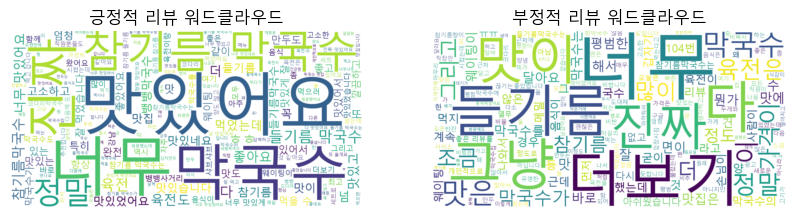

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Í∏çÏ†ïÏ†Å Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
positive_reviews = " ".join(data[data['sentiment'] == 'Í∏çÏ†ïÏ†Å']['Review'].dropna())

# Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
negative_reviews = " ".join(data[data['sentiment'] == 'Î∂ÄÏ†ïÏ†Å']['Review'].dropna())

# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (ÏÇ¨Ïö©Ìï† Ìè∞Ìä∏ Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # WindowsÏóêÏÑú ÎßëÏùÄ Í≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú ÏòàÏãúÏûÖÎãàÎã§.

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud_positive = WordCloud(width=1200, height=600, background_color='white', font_path=font_path).generate(positive_reviews)
wordcloud_negative = WordCloud(width=1200, height=600, background_color='white', font_path=font_path).generate(negative_reviews)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (matplotlibÏö©)
plt.rc('font', family='Malgun Gothic')  # Ìè∞Ìä∏ Ïù¥Î¶ÑÏù¥ Ïò¨Î∞îÎ•¥Í≤å ÏÑ§Ï†ïÎêòÏñ¥Ïïº Ìï©ÎãàÎã§.

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Í∏çÏ†ïÏ†Å Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')

plt.show()


In [25]:
data[data['sentiment']=='Î∂ÄÏ†ïÏ†Å']

Date                                             Review sentiment
0        2Ï£º Ï†Ñ  ÎßâÍµ≠ÏàòÏùò ÎåÄÍ∞Äüåüüåüüåüüåüüåü\nÎ∞∞Í∞Ä ÏûëÏùÄÍ±∞Ïóê ÌïúÌÉÑÌïòÎ©∞ Î™®Îì† ÏùåÏãùÏùÑ Î®πÏßÄ Î™ªÌï¥ Ïä¨Ìîå Ï†ïÎèÑ....       Î∂ÄÏ†ïÏ†Å
11       6Îã¨ Ï†Ñ  ÏùºÌñâÏùÄ ÏΩîÎã§Î¶¨ ÎßâÍµ≠ÏàòÎ•º ÏãúÌÇ§Í≥† Ï†ÄÎäî Îì§Í∏∞Î¶Ñ ÎßâÍµ≠ÏàòÎ•º ÏãúÏº∞Ïñ¥Ïöî. ÏùºÏöîÏùº ÎëêÏãú ÎÑòÏñ¥ Î∞©...       Î∂ÄÏ†ïÏ†Å
21       8Îã¨ Ï†Ñ  Î©¥Ïù¥ ÎöùÎöù ÎÅäÍ∏∞Îäî Ìï®ÎüâÏù¥ ÎÜíÏïÑÎ≥¥Ïó¨Ïöî. Ï∞∏Í∏∞Î¶ÑÌñ•Ïù¥ Í≥†ÏÜåÌïú ÎßâÍµ≠ÏàòÏûÖÎãàÎã§. ÎßàÏßÄÎßâ Ìô©ÌÉúÏú°...       Î∂ÄÏ†ïÏ†Å
62       2Ï£º Ï†Ñ  ÎßõÏûàÎã§Í≥† ÌïòÏó¨ Î∂àÍ∏à Ï†ÄÎÖÅÏãúÍ∞ÑÏóê Ï∞æÏïÑÍ∞Ñ Í∞ÄÍ≤åÏù∏Îç∞Ïöî. Í∞ÄÍ≤å Í¥ëÍ≥† ÏÇ¨ÏßÑ Ï∞çÎäêÎùºÍ≥† Í∞ÄÍ≤åÍ∞Ä ...       Î∂ÄÏ†ïÏ†Å
89       2ÎÖÑ Ï†Ñ  Ï£ºÎ≥ÄÏßÅÏû•Ïù∏Îì§Ïù¥ ÎßéÏïÑÏÑú 11Ïãú30Î∂ÑÏù¥ÌõÑÏóêÍ∞ÄÎ©¥ Îß§Ïû•Î∞ñÏóêÍπåÏßÄ Ï§Ñ ÏÑúÏûàÏùå. ÏÑ∏Ìä∏Í∞ÄÍ≤©13,0...       Î∂ÄÏ†ïÏ†Å
94       2ÎÖÑ Ï†Ñ  ÌèâÏùº Ï†êÏã¨ÏãúÍ∞ÑÏóê Îäò Ïõ®Ïù¥ÌåÖÏù¥ ÏûàÎäî ÎìØÌï©ÎãàÎã§. ÏãùÎãπ Î¨∏ ÏïûÏóê Ï£ºÎ¨∏ Î∞è ÎåÄÍ∏∞Ïã†Ï≤≠ ÏãúÏä§ÌÖú...       Î∂ÄÏ†ïÏ†Å
106      6Îã¨ Ï†Ñ           Ïù¥ ÎèôÎÑ§ Î¨ºÍ∞ÄÎ•º ÏÉùÍ∞ÅÌïòÎ©¥ Í∞ÄÍ≤©ÏùÄ Ïñ¥Ï©î Ïàò ÏóÜÏùå\nÎßõÏùÄ Îã§ÎÖÄÎ≥∏ Ï§ë ÏàòÏ§ÄÍ∏â!       Î∂ÄÏ†ïÏ†Å
110      6Îã¨ Ï†Ñ  Í∞ÄÍ≤©Ïù¥ ÎÑàÎ¨¥ ÎπÑÏåâÎãàÎã§  ÎßåÏù¥Ï≤úÏõê ÌÄÑÎ¶¨Ìã∞Í∞Ä ÏïÑÎãôÎãàÎã§. Ï¢åÏÑù Í∞ÑÍ≤©ÎèÑ ÎπÑÏ¢ÅÏùÄÎç∞ Î∞òÏ∞¨ ÏÖÄÌîÑ...       Î∂ÄÏ†ïÏ†Å
112      2ÎÖÑ Ï†Ñ           Î¨¥Ïä® Ïó¨Í∏∏ Ï§ÑÏÑúÏÑú Î®πÏñ¥!!\nÍ∑∏ÎÉ• Ï£ºÎßêÏóê Í±∑Îã§Í∞Ä ÎçîÏõåÏÑú ÌïúÎ≤à Î®πÎäî Ï†ïÎèÑ‚Ä¶       Î∂ÄÏ†ïÏ†Å
146      5ÎÖÑ Ï†Ñ  ÎπÑÎπîÎßâÍµ≠ÏàòÍ∞Ä Îï°Í≤®ÏÑú Í∞îÎäîÎç∞ Î≥¥ÌÜµÏù¥ÏóàÏñ¥Ïöî!\nÏùºÏöîÏùºÏù∏Îç∞ÎèÑ 6ÏãúÍ∞Ä ÎêòÏûêÎßàÏûê ÏÇ¨ÎûåÏù¥ Î™∞Î†§ÏôîÏñ¥Ïöî       Î∂ÄÏ†ïÏ†Å
148      2ÎÖÑ Ï†Ñ  ÎßõÏùÄ ÏûàÏóàÎäîÎç∞ Í∞ÄÍ≤©Ïù¥ ÎπÑÏã∏ÏÑú Í∞ÄÏÑ±ÎπÑÎ°úÎäî Î≥¥ÌÜµÏûÖÎãàÎã§. Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÏΩîÎã§Î¶¨ ÎßâÍµ≠ÏàòÎÇò ÎπÑ...       Î∂ÄÏ†ïÏ†Å
151      1ÎÖÑ Ï†Ñ                                  ÎßõÏûàÍ∏∞Îäî ÌïòÏßÄÎßå ÎπÑÏãº ÎäêÎÇåÏù¥ÏòàÏöî       Î∂ÄÏ†ïÏ†Å
163      2ÎÖÑ Ï†Ñ  ÎßâÍµ≠Ïàò Ï∞∏Í∏∞Î¶ÑÍ≥º Îì§Í∏∞Î¶Ñ Îëê Í∞ÄÏßÄ ÎßõÏù¥ Ï£ºÏöî Î©îÎâ¥Ïù¥Îã§ ÏóÑÏ≤≠ ÎßõÏûàÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå Í∑∏Îü≠...       Î∂ÄÏ†ïÏ†Å
165      2ÎÖÑ Ï†Ñ                                      ÌèâÎ≤îÌïú ÎßâÍµ≠Ïàò ÎßõÏûÖÎãàÎã§.       Î∂ÄÏ†ïÏ†Å
177      3ÎÖÑ Ï†Ñ             Î¨ºÎÉâÎ©¥ Ïú°ÏàòÎäî Í∞úÌåêÏûÖÎãàÎã§\nÏùå..ÎåÄÎüâÏÉùÏÇ∞ ÏñºÏùåÏú°Ïàò Îã¨Í≥†,ÏãúÍ≥† ....       Î∂ÄÏ†ïÏ†Å
180      2ÎÖÑ Ï†Ñ  ÏïÑÎ¨¥Î¶¨ ÎßêÌï¥ÎèÑ Ïã§ÎßùÏä§ÎüΩÏäµÎãàÎã§. Ï¢ãÏùÄ Î¶¨Î∑∞Î•º Î™®Îëê Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ïñ¥Î†µÏäµÎãàÎã§.\n\nÏ¢ãÏùÄ ...       Î∂ÄÏ†ïÏ†Å
181      2Ï£º Ï†Ñ  Îß§Ïö∞ ÌèâÍ∑†Ï†ÅÏûÖÎãàÎã§. Ï¢ãÏùÄ Î¶¨Î∑∞Î•º ÎÑàÎ¨¥ ÎßéÏù¥ ÏùΩÏñ¥ÏÑú Ïã§ÎßùÌñàÏäµÎãàÎã§. Íµ¨Í∏Ä Ïä§ÏΩîÏñ¥Îäî Ïûò ...       Î∂ÄÏ†ïÏ†Å
185      7Îã¨ Ï†Ñ               Ïú†Î™ÖÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïú†Î™ÖÌïú Í≤É Í∞ôÏäµÎãàÎã§. Ïû¨Î∞©Î¨∏Ïù¥ ÌôïÏã§ÌïòÏßÄ ÏïäÏäµÎãàÎã§.       Î∂ÄÏ†ïÏ†Å
196      2ÎÖÑ Ï†Ñ                                                  Îì±       Î∂ÄÏ†ïÏ†Å
197      3ÎÖÑ Ï†Ñ                                      Îß§Ïö∞ Ïó¥ÏïÖÌïú Í≥†Í∞ù ÏÑúÎπÑÏä§       Î∂ÄÏ†ïÏ†Å
203   2024-10   Ï†úÎ°úÌéòÏù¥ ÎêúÎã§Í≥† Í¥ëÍ≥†Ìï¥ÏÑú Í∞ìÎçîÎãà ÏïàÎêúÎã§Í≥† ÎÇòÍ∞ÄÎùºÍ≥† ÌïòÎÑ§Ïöî. Ï†ïÏ†ïÌï¥ÎÜîÎùº ÌóõÍ±∏ÏùåÌïòÍ≤åÌïòÏßÄÎßêÍ≥†       Î∂ÄÏ†ïÏ†Å
207   2024-10        ÎßõÏßëÏùÄ ÏïÑÎãàÍ≥†, Í∑∏ÎÉ• Î¨¥ÎÇúÌïú ÎßâÍµ≠ÏàòÏßë\nÎßõÏù¥ ÏóÜÏßÄÎèÑ ÏïäÏùå Í∑∏ÎÉ• ÍπîÎÅî ÌèâÎ≤î ÎÅù.       Î∂ÄÏ†ïÏ†Å
212   2024-09  ÎåÄÍ∏∞Î≤àÌò∏ 105Î≤àÏúºÎ°ú Ïõ®Ïù¥ÌåÖÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÍ≤å Î¨∏ Î∞îÎ°ú ÏïûÏóêÏÑú Ï†êÏõêÏù¥ 104Î≤à Î∂àÎ†ÄÎäî...       Î∂ÄÏ†ïÏ†Å
214   2024-09  - Ï†ïÌÜµ Î©îÎ∞ÄÎßâÍµ≠ÏàòÎùºÍ∏∞Î≥¥Îã® Ìì®Ï†Ñ ÎßâÍµ≠Ïàò...? \n(Î©îÎ∞ÄÎ©¥ Î≥¥Îã® ÏÜåÎ©¥Ïóê Í∞ÄÍπåÏö¥ ÎäêÎÇå...       Î∂ÄÏ†ïÏ†Å
222   2024-08  Ïú°Ï†ÑÏù¥ ÎßõÏûàÎäî Ïßë! ÏùåÏãù Îπ®Î¶¨ÎÇòÏò¥.\nÏûêÎ¶¨Ï∞©ÏÑùÌïòÍ≥† Í±∞ÏùòÎã§ Î®πÏùÄÏãúÍ∞ÑÏù¥ 30Î∂ÑÏ†ïÎèÑ ÎêòÏóà...       Î∂ÄÏ†ïÏ†Å
230   2024-06  ‚ÄòÎßâÍµ≠Ïàò‚ÄôÍ∞Ä ÏïÑÎãàÎùº ‚ÄòÏÉàÎ°úÏö¥ Íµ≠Ïàò‚ÄôÎ•º Î®πÏúºÎü¨ ÏôîÎã§Í≥† ÏÉùÍ∞ÅÌï¥Ïïº Ìï† ÎìØÌï©ÎãàÎã§.\nÏïÑÎû´Î∂Ñ...       Î∂ÄÏ†ïÏ†Å
231   2024-06  Î©îÎ∞Ä ÎπÑÏú® 70% Ïù¥ÎùºÎäîÎç∞\n50% ÏàòÏ§ÄÎäêÎÇåÏûÑ. \nÎ©¥Î∞úÏùò ÎßõÎ≥¥Îã§Îäî \nÍ∞ÅÏ¢Ö ÏñëÎÖê ...       Î∂ÄÏ†ïÏ†Å
233   2024-06                                                 ÏïÑÎûç       Î∂ÄÏ†ïÏ†Å
234   2024-06  Îî±Î¥êÎèÑ Ïñë Ï†ÅÏñ¥Î≥¥Ïó¨ÏÑú 

In [21]:
data = data[data['sentiment'] != 'NaN']
data

Date                                             Review sentiment
0       1ÎÖÑ Ï†Ñ  ÌïúÏö∞ ÏïîÏÜåÏßë, Î™®Îì¨Íµ¨Ïù¥ÏôÄ Ïú°Ìöå ÏãúÏº∞ÎäîÎç∞ ÏÇ¥Ïπò Îì±Ïã¨ Í∞àÎπÑÏÇ¥Îì±Ïù¥ ÏïÑÏ£º ÎßõÏûàÏóàÎã§ ÏñëÎèÑ Í∑∏...       Í∏çÏ†ïÏ†Å
1       4ÎÖÑ Ï†Ñ             Ï∂îÏ≤úÎ©îÎâ¥: ÏÉàÏö∞ÏÇ¥\n\n- Íµ≠ÎÇ¥ÏÇ∞ ÏïîÏÜå, ÌïúÏö∞Ïù∏Îç∞ÎèÑ Í∞ÄÍ≤©ÎåÄÍ∞Ä Ï¢ãÏùÄÌé∏‚Ä¶       Í∏çÏ†ïÏ†Å
2      10Îã¨ Ï†Ñ                          ÏñëÏû¨ ÏÜåÏû¨ Ïú°ÌöåÎπÑÎπîÎ∞•ÌååÎäî Ïßë Ï§ëÏóê Ï†úÏùº Í¥úÏ∂òÌï®       Í∏çÏ†ïÏ†Å
3       2ÎÖÑ Ï†Ñ                            ÏÉàÏö∞ÏÇ¥ Ïß± ÏûÖÎãàÎã§. Í¥ëÏ£ºÎ¨¥Îì±ÏÇ∞ Ïû¨Î£åÏùò Í∞ÄÏπò       Í∏çÏ†ïÏ†Å
4       1Îã¨ Ï†Ñ                                        Í∞ÄÏÑ±ÎπÑÍ∞Ä ÎÅùÎÇ¥Ï§çÎãàÎã§!       Í∏çÏ†ïÏ†Å
..       ...                                                ...       ...
138  2019-08                                   ÎÑàÎØÄÏπúÏ†àÌïòÏãúÍ≥† ÏÇ¥ÏπòÏÇ¥ ÎßõÏûáÏñ¥Ïö©       Í∏çÏ†ïÏ†Å
139  2019-06                    Îì±Ïã¨ ÎßõÏûàÏñ¥Ïöî Îã®Ï≤¥ ÌöåÏãùÏúºÎ°ú Î®πÏóàÏßÄÎßå Î™®Îëê ÎßåÏ°±ÌñàÏäµÎãàÎã§~       Í∏çÏ†ïÏ†Å
140  2019-06            Ïù¥Ï†ú Ïò§ÌîàÌïú ÏßëÏù¥Îùº Íπ®ÎÅóÌïòÍ≥† Í≥†Í∏∞Ïùò ÏßàÎèÑ Îß§Ïö∞ Ï¢ãÏïòÏäµÎãàÎã§! Î≤àÏ∞ΩÌïòÏÑ∏Ïöî!       Í∏çÏ†ïÏ†Å
141  2019-02                        Ïú°ÌöåÎπÑÎπïÎ∞• ÏãúÌÇ§Î©¥ Íµ≠ÎèÑ ÌïúÍ∑∏Î¶á Í∞ôÏù¥ ÎÇòÏôÄÏú† Ï°¥ÎßõÌÉ±       Í∏çÏ†ïÏ†Å
142  2018-07                                                Ï¢ãÏïÑÏöî       Í∏çÏ†ïÏ†Å

[137 rows x 3 columns]

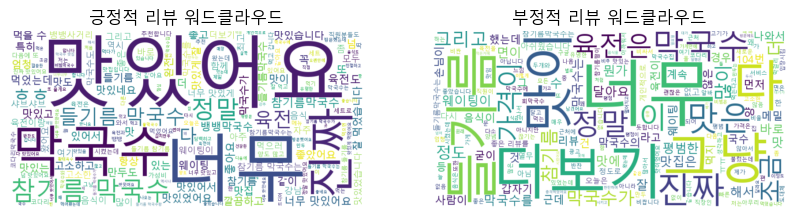

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Í∏çÏ†ïÏ†Å Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
positive_reviews = " ".join(data[data['sentiment'] == 'Í∏çÏ†ïÏ†Å']['Review'].dropna())

# Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
negative_reviews = " ".join(data[data['sentiment'] == 'Î∂ÄÏ†ïÏ†Å']['Review'].dropna())

# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (ÏÇ¨Ïö©Ìï† Ìè∞Ìä∏ Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # WindowsÏóêÏÑú ÎßëÏùÄ Í≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú ÏòàÏãúÏûÖÎãàÎã§.

# 1. Î∂ÄÏ†ïÏ†Å Îã®Ïñ¥ Î™©Î°ù ÌïÑÌÑ∞ÎßÅ
negative_words = ['ÎÇòÏÅòÎã§', 'Î∂àÎßåÏ°±', 'Ïã´Îã§', 'Î∂àÌé∏', 'Î∂ÄÏ°±', 'Ïã§Îßù', 'ÏßúÏ¶ù', 'ÌûòÎì§Îã§', 'Î∂àÏæå', 'ÏµúÏïÖ']
negative_reviews_filtered = " ".join([word for word in negative_reviews.split() if word in negative_words])

# 2. Í∞êÏ†ï Î∂ÑÏÑù ÏÇ¨Ï†Ñ ÌôúÏö© (Îã®Ïàú Í∞ÄÏ§ëÏπò Ï°∞Ï†à)
negative_reviews_emphasized = " ".join([word * 3 if word in negative_words else word for word in negative_reviews_filtered.split()])

# 3. Î∂ÄÏ†ïÏñ¥ Í∞ïÏ°∞
negative_reviews_emphasized = negative_reviews_emphasized.replace("Ïïà", "Ïïà_Ïïà_Ïïà").replace("Î™ª", "Î™ª_Î™ª_Î™ª").replace("Î∂àÎßå", "Î∂àÎßå_Î∂àÎßå_Î∂àÎßå")
negative_reviews_emphasized = negative_reviews_emphasized.replace("ÏóÜÎã§", "ÏóÜÎã§_ÏóÜÎã§_ÏóÜÎã§").replace("Ïã´Îã§", "Ïã´Îã§_Ïã´Îã§_Ïã´Îã§")

# Îπà ÌÖçÏä§Ìä∏ Ï≤òÎ¶¨: ÌïÑÌÑ∞ÎßÅ ÌõÑ ÌÖçÏä§Ìä∏Í∞Ä ÎπÑÏñ¥ÏûàÏúºÎ©¥ ÏõêÎûò Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ ÏÇ¨Ïö©
if not negative_reviews_emphasized.strip():
    negative_reviews_emphasized = negative_reviews

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(negative_reviews_emphasized)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (matplotlibÏö©)
plt.rc('font', family='Malgun Gothic')  # Ìè∞Ìä∏ Ïù¥Î¶ÑÏù¥ Ïò¨Î∞îÎ•¥Í≤å ÏÑ§Ï†ïÎêòÏñ¥Ïïº Ìï©ÎãàÎã§.

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Í∏çÏ†ïÏ†Å Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')

plt.show()


In [38]:
negative_reviews_df = data[data['sentiment'] == 'Î∂ÄÏ†ïÏ†Å']
negative_reviews_df

Date                                             Review sentiment
0        2Ï£º Ï†Ñ  ÎßâÍµ≠ÏàòÏùò ÎåÄÍ∞Äüåüüåüüåüüåüüåü\nÎ∞∞Í∞Ä ÏûëÏùÄÍ±∞Ïóê ÌïúÌÉÑÌïòÎ©∞ Î™®Îì† ÏùåÏãùÏùÑ Î®πÏßÄ Î™ªÌï¥ Ïä¨Ìîå Ï†ïÎèÑ....       Î∂ÄÏ†ïÏ†Å
11       6Îã¨ Ï†Ñ  ÏùºÌñâÏùÄ ÏΩîÎã§Î¶¨ ÎßâÍµ≠ÏàòÎ•º ÏãúÌÇ§Í≥† Ï†ÄÎäî Îì§Í∏∞Î¶Ñ ÎßâÍµ≠ÏàòÎ•º ÏãúÏº∞Ïñ¥Ïöî. ÏùºÏöîÏùº ÎëêÏãú ÎÑòÏñ¥ Î∞©...       Î∂ÄÏ†ïÏ†Å
21       8Îã¨ Ï†Ñ  Î©¥Ïù¥ ÎöùÎöù ÎÅäÍ∏∞Îäî Ìï®ÎüâÏù¥ ÎÜíÏïÑÎ≥¥Ïó¨Ïöî. Ï∞∏Í∏∞Î¶ÑÌñ•Ïù¥ Í≥†ÏÜåÌïú ÎßâÍµ≠ÏàòÏûÖÎãàÎã§. ÎßàÏßÄÎßâ Ìô©ÌÉúÏú°...       Î∂ÄÏ†ïÏ†Å
62       2Ï£º Ï†Ñ  ÎßõÏûàÎã§Í≥† ÌïòÏó¨ Î∂àÍ∏à Ï†ÄÎÖÅÏãúÍ∞ÑÏóê Ï∞æÏïÑÍ∞Ñ Í∞ÄÍ≤åÏù∏Îç∞Ïöî. Í∞ÄÍ≤å Í¥ëÍ≥† ÏÇ¨ÏßÑ Ï∞çÎäêÎùºÍ≥† Í∞ÄÍ≤åÍ∞Ä ...       Î∂ÄÏ†ïÏ†Å
89       2ÎÖÑ Ï†Ñ  Ï£ºÎ≥ÄÏßÅÏû•Ïù∏Îì§Ïù¥ ÎßéÏïÑÏÑú 11Ïãú30Î∂ÑÏù¥ÌõÑÏóêÍ∞ÄÎ©¥ Îß§Ïû•Î∞ñÏóêÍπåÏßÄ Ï§Ñ ÏÑúÏûàÏùå. ÏÑ∏Ìä∏Í∞ÄÍ≤©13,0...       Î∂ÄÏ†ïÏ†Å
94       2ÎÖÑ Ï†Ñ  ÌèâÏùº Ï†êÏã¨ÏãúÍ∞ÑÏóê Îäò Ïõ®Ïù¥ÌåÖÏù¥ ÏûàÎäî ÎìØÌï©ÎãàÎã§. ÏãùÎãπ Î¨∏ ÏïûÏóê Ï£ºÎ¨∏ Î∞è ÎåÄÍ∏∞Ïã†Ï≤≠ ÏãúÏä§ÌÖú...       Î∂ÄÏ†ïÏ†Å
106      6Îã¨ Ï†Ñ           Ïù¥ ÎèôÎÑ§ Î¨ºÍ∞ÄÎ•º ÏÉùÍ∞ÅÌïòÎ©¥ Í∞ÄÍ≤©ÏùÄ Ïñ¥Ï©î Ïàò ÏóÜÏùå\nÎßõÏùÄ Îã§ÎÖÄÎ≥∏ Ï§ë ÏàòÏ§ÄÍ∏â!       Î∂ÄÏ†ïÏ†Å
110      6Îã¨ Ï†Ñ  Í∞ÄÍ≤©Ïù¥ ÎÑàÎ¨¥ ÎπÑÏåâÎãàÎã§  ÎßåÏù¥Ï≤úÏõê ÌÄÑÎ¶¨Ìã∞Í∞Ä ÏïÑÎãôÎãàÎã§. Ï¢åÏÑù Í∞ÑÍ≤©ÎèÑ ÎπÑÏ¢ÅÏùÄÎç∞ Î∞òÏ∞¨ ÏÖÄÌîÑ...       Î∂ÄÏ†ïÏ†Å
112      2ÎÖÑ Ï†Ñ           Î¨¥Ïä® Ïó¨Í∏∏ Ï§ÑÏÑúÏÑú Î®πÏñ¥!!\nÍ∑∏ÎÉ• Ï£ºÎßêÏóê Í±∑Îã§Í∞Ä ÎçîÏõåÏÑú ÌïúÎ≤à Î®πÎäî Ï†ïÎèÑ‚Ä¶       Î∂ÄÏ†ïÏ†Å
146      5ÎÖÑ Ï†Ñ  ÎπÑÎπîÎßâÍµ≠ÏàòÍ∞Ä Îï°Í≤®ÏÑú Í∞îÎäîÎç∞ Î≥¥ÌÜµÏù¥ÏóàÏñ¥Ïöî!\nÏùºÏöîÏùºÏù∏Îç∞ÎèÑ 6ÏãúÍ∞Ä ÎêòÏûêÎßàÏûê ÏÇ¨ÎûåÏù¥ Î™∞Î†§ÏôîÏñ¥Ïöî       Î∂ÄÏ†ïÏ†Å
148      2ÎÖÑ Ï†Ñ  ÎßõÏùÄ ÏûàÏóàÎäîÎç∞ Í∞ÄÍ≤©Ïù¥ ÎπÑÏã∏ÏÑú Í∞ÄÏÑ±ÎπÑÎ°úÎäî Î≥¥ÌÜµÏûÖÎãàÎã§. Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÏΩîÎã§Î¶¨ ÎßâÍµ≠ÏàòÎÇò ÎπÑ...       Î∂ÄÏ†ïÏ†Å
151      1ÎÖÑ Ï†Ñ                                  ÎßõÏûàÍ∏∞Îäî ÌïòÏßÄÎßå ÎπÑÏãº ÎäêÎÇåÏù¥ÏòàÏöî       Î∂ÄÏ†ïÏ†Å
163      2ÎÖÑ Ï†Ñ  ÎßâÍµ≠Ïàò Ï∞∏Í∏∞Î¶ÑÍ≥º Îì§Í∏∞Î¶Ñ Îëê Í∞ÄÏßÄ ÎßõÏù¥ Ï£ºÏöî Î©îÎâ¥Ïù¥Îã§ ÏóÑÏ≤≠ ÎßõÏûàÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå Í∑∏Îü≠...       Î∂ÄÏ†ïÏ†Å
165      2ÎÖÑ Ï†Ñ                                      ÌèâÎ≤îÌïú ÎßâÍµ≠Ïàò ÎßõÏûÖÎãàÎã§.       Î∂ÄÏ†ïÏ†Å
177      3ÎÖÑ Ï†Ñ             Î¨ºÎÉâÎ©¥ Ïú°ÏàòÎäî Í∞úÌåêÏûÖÎãàÎã§\nÏùå..ÎåÄÎüâÏÉùÏÇ∞ ÏñºÏùåÏú°Ïàò Îã¨Í≥†,ÏãúÍ≥† ....       Î∂ÄÏ†ïÏ†Å
180      2ÎÖÑ Ï†Ñ  ÏïÑÎ¨¥Î¶¨ ÎßêÌï¥ÎèÑ Ïã§ÎßùÏä§ÎüΩÏäµÎãàÎã§. Ï¢ãÏùÄ Î¶¨Î∑∞Î•º Î™®Îëê Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ïñ¥Î†µÏäµÎãàÎã§.\n\nÏ¢ãÏùÄ ...       Î∂ÄÏ†ïÏ†Å
181      2Ï£º Ï†Ñ  Îß§Ïö∞ ÌèâÍ∑†Ï†ÅÏûÖÎãàÎã§. Ï¢ãÏùÄ Î¶¨Î∑∞Î•º ÎÑàÎ¨¥ ÎßéÏù¥ ÏùΩÏñ¥ÏÑú Ïã§ÎßùÌñàÏäµÎãàÎã§. Íµ¨Í∏Ä Ïä§ÏΩîÏñ¥Îäî Ïûò ...       Î∂ÄÏ†ïÏ†Å
185      7Îã¨ Ï†Ñ               Ïú†Î™ÖÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïú†Î™ÖÌïú Í≤É Í∞ôÏäµÎãàÎã§. Ïû¨Î∞©Î¨∏Ïù¥ ÌôïÏã§ÌïòÏßÄ ÏïäÏäµÎãàÎã§.       Î∂ÄÏ†ïÏ†Å
196      2ÎÖÑ Ï†Ñ                                                  Îì±       Î∂ÄÏ†ïÏ†Å
197      3ÎÖÑ Ï†Ñ                                      Îß§Ïö∞ Ïó¥ÏïÖÌïú Í≥†Í∞ù ÏÑúÎπÑÏä§       Î∂ÄÏ†ïÏ†Å
203   2024-10   Ï†úÎ°úÌéòÏù¥ ÎêúÎã§Í≥† Í¥ëÍ≥†Ìï¥ÏÑú Í∞ìÎçîÎãà ÏïàÎêúÎã§Í≥† ÎÇòÍ∞ÄÎùºÍ≥† ÌïòÎÑ§Ïöî. Ï†ïÏ†ïÌï¥ÎÜîÎùº ÌóõÍ±∏ÏùåÌïòÍ≤åÌïòÏßÄÎßêÍ≥†       Î∂ÄÏ†ïÏ†Å
207   2024-10        ÎßõÏßëÏùÄ ÏïÑÎãàÍ≥†, Í∑∏ÎÉ• Î¨¥ÎÇúÌïú ÎßâÍµ≠ÏàòÏßë\nÎßõÏù¥ ÏóÜÏßÄÎèÑ ÏïäÏùå Í∑∏ÎÉ• ÍπîÎÅî ÌèâÎ≤î ÎÅù.       Î∂ÄÏ†ïÏ†Å
212   2024-09  ÎåÄÍ∏∞Î≤àÌò∏ 105Î≤àÏúºÎ°ú Ïõ®Ïù¥ÌåÖÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÍ≤å Î¨∏ Î∞îÎ°ú ÏïûÏóêÏÑú Ï†êÏõêÏù¥ 104Î≤à Î∂àÎ†ÄÎäî...       Î∂ÄÏ†ïÏ†Å
214   2024-09  - Ï†ïÌÜµ Î©îÎ∞ÄÎßâÍµ≠ÏàòÎùºÍ∏∞Î≥¥Îã® Ìì®Ï†Ñ ÎßâÍµ≠Ïàò...? \n(Î©îÎ∞ÄÎ©¥ Î≥¥Îã® ÏÜåÎ©¥Ïóê Í∞ÄÍπåÏö¥ ÎäêÎÇå...       Î∂ÄÏ†ïÏ†Å
222   2024-08  Ïú°Ï†ÑÏù¥ ÎßõÏûàÎäî Ïßë! ÏùåÏãù Îπ®Î¶¨ÎÇòÏò¥.\nÏûêÎ¶¨Ï∞©ÏÑùÌïòÍ≥† Í±∞ÏùòÎã§ Î®πÏùÄÏãúÍ∞ÑÏù¥ 30Î∂ÑÏ†ïÎèÑ ÎêòÏóà...       Î∂ÄÏ†ïÏ†Å
230   2024-06  ‚ÄòÎßâÍµ≠Ïàò‚ÄôÍ∞Ä ÏïÑÎãàÎùº ‚ÄòÏÉàÎ°úÏö¥ Íµ≠Ïàò‚ÄôÎ•º Î®πÏúºÎü¨ ÏôîÎã§Í≥† ÏÉùÍ∞ÅÌï¥Ïïº Ìï† ÎìØÌï©ÎãàÎã§.\nÏïÑÎû´Î∂Ñ...       Î∂ÄÏ†ïÏ†Å
231   2024-06  Î©îÎ∞Ä ÎπÑÏú® 70% Ïù¥ÎùºÎäîÎç∞\n50% ÏàòÏ§ÄÎäêÎÇåÏûÑ. \nÎ©¥Î∞úÏùò ÎßõÎ≥¥Îã§Îäî \nÍ∞ÅÏ¢Ö ÏñëÎÖê ...       Î∂ÄÏ†ïÏ†Å
233   2024-06                                                 ÏïÑÎûç       Î∂ÄÏ†ïÏ†Å
234   2024-06  Îî±Î¥êÎèÑ Ïñë Ï†ÅÏñ¥Î≥¥Ïó¨ÏÑú 

In [39]:
len(negative_reviews_df)

60

In [40]:
negative_reviews_df.to_csv('negative_reviews.csv', index=False, encoding='utf-8-sig')


In [33]:
# Îßõ, Í∞ÄÍ≤©, Î©îÎâ¥ ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ (ÏúÑÏóêÏÑú Ï†ïÏùòÌïú Î¶¨Ïä§Ìä∏ ÏÇ¨Ïö©)
taste_keywords_negative = [
    "ÎßõÏóÜÎã§", "Ïã±Í≤ÅÎã§", "ÏßúÎã§", "Ïì∞Îã§", "ÏÉÅÌïòÎã§", "ÎäêÎÅºÌïòÎã§", "ÎßµÎã§", "Í∑∏ÏùÑÎ¶∞Îßõ", "ÏßàÍ∏∞Îã§",
    "ÎÖ∏Îßõ", "Ï°¥ÎßõÌÉ± Î∞òÎåÄ (JMT Î∞òÎåÄ)", "ÎßπÎßπÌï®", "ÎäêÎÅºÌè≠Î∞ú", "ÎÑàÎ¨¥ ÏûêÍ∑πÏ†ÅÏûÑ", "Î¨ºÎßõ", "ÎÑàÎ¨¥ ÌèâÎ≤î", 
    "ÌïòÏ∞ÆÏùÄ Îßõ", "ÎßõÏóÜÏ∞ê", "ÎßõÏóÜÏñ¥ÏÑú ÌôîÎÇ®", "Îî±Îî±", "ÎÉÑÏÉà", "Ï´ÑÍπÉÏ´ÑÍπÉ", "ÏãùÍ∞êÏù¥ Ï¢ãÎã§", 
    "ÏµúÏï†", "Ïú§Í∏∞", "Ï¢îÏ¢î", "Îã¨Îã¨Íµ¨Î¶¨", "Îã¨Îã¨", "ÌîÑÎ†àÏâ¨", "Îã¨ÏßùÏßÄÍ∑º",
    "ÎßõÏûàÎã§", "Îã¨Îã§", "Ïã†ÏÑ†ÌïòÎã§", "ÌíçÎØ∏", "Ìñ•", "Í∞êÏπ†Îßõ", 
    "Í∞úÏö¥ÌïòÎã§", "ÏãùÍ∞ê", "ÏßàÍ∞ê", "Îß§ÏΩ§ÌïòÎã§", "Î∂àÎßõ", "Ïó∞ÌïòÎã§",
    "Ï°¥ÎßõÌÉ± (JMT)", "ÎßµÏûòÏïå", "Íæ∏ÎçïÍæ∏Îçï", "Ï¥âÏ¥â+Î∞îÏÇ≠", "Îã®Ïß†Îã®Ïß†", 
    "Í≤âÎ∞îÏÜçÏ¥â", "Ï§ëÎèÖÏÑ± ÏûàÏùå", "ÍπîÎÅîÌïú Îßõ", "Í≥†ÏÜåÌï® Ìè≠Î∞ú", "ÌôîÎÅàÌïú Îß§Ïö¥Îßõ",
    "Î∞∏Îü∞Ïä§", "ÌíçÎ∂ÄÌï®", "ÌÅ¨Î¶¨ÎØ∏Ìï®", "ÌÜ°ÏèòÎäî Îßõ", "Ï´ÑÍπÉÏ´ÑÍπÉ", "ÏãùÍ∞êÏù¥ Ï¢ãÎã§", 
    "ÏµúÏï†", "Ï°¥Îßõ", "Ïú§Í∏∞", "Ï¢îÏ¢î", "Ïã†ÏÑ†", "Îã¨Îã¨Íµ¨Î¶¨", "Îã¨Îã¨", 
    "ÌîÑÎ†àÏâ¨", "ÏïÑÏÇ≠", "Í∞êÎèô", "ÏßÄÎ†§Ïöî", "ÏßÄÎ¶ΩÎãàÎã§", "Îã¨ÏßùÏßÄÍ∑º"
]

price_keywords_negative = [
    "ÎπÑÏã∏Îã§", "ÎπÑÏãº Í∞ê", "Î∂ÄÏ†ÅÏ†àÌïú Í∞ÄÍ≤©", "Í≥ºÌïòÎã§", "Î∂ÄÎã¥ÎêúÎã§", "Í∞ÄÏÑ±ÎπÑ Î≥ÑÎ°ú", "Îèà ÏïÑÍπåÏõÄ", 
    "ÎπÑÏã∏Í∏∞Îßå Ìï®", "Ìè≠Î¶¨ ÎäêÎÇå", "ÏÇ¨ÏπòÌíà Í∞ÄÍ≤©", "ÎààÌÉ±Ïù¥ ÎßûÏùÄ ÎäêÎÇå", "Î∞îÍ∞ÄÏßÄ ÏçºÎã§", 
    "ÏßÄÍ∞ë ÌÑ∏Î¶º Ï£ºÏùò (but ÎπÑÏ∂î)", "Í∞ÄÍ≤© ÎåÄÎπÑ Ïã§Îßù", "Ï∞êÏúºÎ°ú ÏïÑÍπùÎã§", "Í∞ÄÏÑ±ÎπÑ",
    "Ï†ÄÎ†¥ÌïòÎã§", "Í∞ÄÏÑ±ÎπÑ", "Í∞ÄÍ≤© ÎåÄÎπÑ", "Ìï©Î¶¨Ï†Å", 
    "Ìï†Ïù∏", "Ïù¥Î≤§Ìä∏", "Îèà Í∞íÏñ¥Ïπò",
    "Í∞ÄÏÑ±ÎπÑ ÎØ∏Ï≥§Îã§", "Í∞ÄÏã¨ÎπÑ Í∞í", "Í∞ÄÏò§Ìîà ÌäπÍ∞Ä", "Í∞ìÏÑ±ÎπÑ", "ÏßÄÍ∞ë ÌÑ∏Î¶ºÏ£ºÏùò", 
    "ÎààÎ¨ºÏùò Í∞ÄÍ≤©", "ÏÜåÌôïÌñâ ÏÜåÎπÑ", "Î™ÖÌíàÍ∏â Í∞ÄÍ≤©", "ÌïúÏ†ïÌåê ÎäêÎÇå", "Í∞ÄÏÑ±ÎπÑ"
]

menu_keywords_negative = [
    "Î©îÎâ¥ Î∂ÄÏ°±", "ÏïåÎ†àÎ•¥Í∏∞ Ïú†Î∞ú", "ÏùåÏãù Ïñë Ï†ÅÎã§", "ÏÇ¨ÏßÑÏù¥Îûë Îã§Î¶Ñ", "ÎπÑÏ£ºÏñº ÎÇöÏûÑ", "ÏµúÏïÖÏùò Î©îÎâ¥", 
    "Ìïú Î≤àÎßå Î®πÍ≥† ÎÅù", "ÏûÖÎßõÏóê Ïïà ÎßûÏùå", "Î¶¨ÌïÑ Î∂àÍ∞Ä", "Íµ¨ÏÑ± Î∂àÎßåÏ°±", "Ï∞®ÎùºÎ¶¨ ÏßëÎ∞•", "ÎπÑÍ±¥ Î∂àÏπúÏ†à",
    "Îã§ÏñëÌïú Î©îÎâ¥", "ÏãúÍ∑∏ÎãàÏ≤ò Î©îÎâ¥", "ÎåÄÌëú Î©îÎâ¥", "Ï∂îÏ≤ú Î©îÎâ¥", 
    "Ïù∏Í∏∞ Î©îÎâ¥", "Ïã†Î©îÎâ¥", "Í≥ÑÏ†à Î©îÎâ¥", "ÏÇ¨Ïù¥Îìú Î©îÎâ¥", 
    "Î©îÎâ¥ ÏÑ§Î™Ö", "ÏùåÏãù Ïñë ÎßéÎã§", "Íµ¨ÏÑ±", "ÏÑ∏Ìä∏ Î©îÎâ¥", 
    "ÎπÑÍ±¥", "Í∏ÄÎ£®ÌÖê ÌîÑÎ¶¨", "ÏãùÎã®", "Í±¥Í∞ï Î©îÎâ¥",
    "Ïù∏ÏÉù Î©îÎâ¥", "ÏûÖÎçï Î©îÎâ¥", "ÏãúÍ∑∏ÎãàÏ≤òÌÖú", "Ïù∏Ïä§ÌÉÄ Í∞êÏÑ±", "ÎπÑÏ£ºÏñº ÎÅùÌåêÏôï",
    "ÌòºÎ∞• Í∞Å", "Íº≠ Î®πÏñ¥Ïïº Ìï† Î©îÎâ¥", "ÏµúÏï† Î©îÎâ¥", "Î¶¨ÎØ∏Ìã∞Îìú ÏóêÎîîÏÖò"
]

# Í∞Å Î¶¨Î∑∞Í∞Ä Îßõ, Í∞ÄÍ≤©, Î©îÎâ¥ Ï§ë Ïñ¥Îäê Ìï≠Î™©Í≥º Í¥ÄÎ†® ÏûàÎäîÏßÄ ÌåêÎ≥ÑÌïòÎäî Ìï®Ïàò
def categorize_review(review):
    review = review.lower()  # ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôòÌïòÏó¨ ÎπÑÍµê
    if any(keyword in review for keyword in taste_keywords_negative):
        return 'Îßõ'
    elif any(keyword in review for keyword in price_keywords_negative):
        return 'Í∞ÄÍ≤©'
    elif any(keyword in review for keyword in menu_keywords_negative):
        return 'Î©îÎâ¥'
    else:
        return 'Í∏∞ÌÉÄ'  # Ïñ¥Îäê Ïπ¥ÌÖåÍ≥†Î¶¨ÏóêÎèÑ ÏÜçÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞

# 'Category' Ïª¨Îüº ÏÉùÏÑ±ÌïòÏó¨ Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Î•º ÌëúÏãú
negative_reviews_df.loc[:, 'Category'] = negative_reviews_df['Review'].apply(categorize_review)
negative_reviews_df


C:\Users\5-11\AppData\Local\Temp\ipykernel_10356\611605428.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df.loc[:, 'Category'] = negative_reviews_df['Review'].apply(categorize_review)


Date                                             Review sentiment  \
0        2Ï£º Ï†Ñ  ÎßâÍµ≠ÏàòÏùò ÎåÄÍ∞Äüåüüåüüåüüåüüåü\nÎ∞∞Í∞Ä ÏûëÏùÄÍ±∞Ïóê ÌïúÌÉÑÌïòÎ©∞ Î™®Îì† ÏùåÏãùÏùÑ Î®πÏßÄ Î™ªÌï¥ Ïä¨Ìîå Ï†ïÎèÑ....       Î∂ÄÏ†ïÏ†Å   
11       6Îã¨ Ï†Ñ  ÏùºÌñâÏùÄ ÏΩîÎã§Î¶¨ ÎßâÍµ≠ÏàòÎ•º ÏãúÌÇ§Í≥† Ï†ÄÎäî Îì§Í∏∞Î¶Ñ ÎßâÍµ≠ÏàòÎ•º ÏãúÏº∞Ïñ¥Ïöî. ÏùºÏöîÏùº ÎëêÏãú ÎÑòÏñ¥ Î∞©...       Î∂ÄÏ†ïÏ†Å   
21       8Îã¨ Ï†Ñ  Î©¥Ïù¥ ÎöùÎöù ÎÅäÍ∏∞Îäî Ìï®ÎüâÏù¥ ÎÜíÏïÑÎ≥¥Ïó¨Ïöî. Ï∞∏Í∏∞Î¶ÑÌñ•Ïù¥ Í≥†ÏÜåÌïú ÎßâÍµ≠ÏàòÏûÖÎãàÎã§. ÎßàÏßÄÎßâ Ìô©ÌÉúÏú°...       Î∂ÄÏ†ïÏ†Å   
62       2Ï£º Ï†Ñ  ÎßõÏûàÎã§Í≥† ÌïòÏó¨ Î∂àÍ∏à Ï†ÄÎÖÅÏãúÍ∞ÑÏóê Ï∞æÏïÑÍ∞Ñ Í∞ÄÍ≤åÏù∏Îç∞Ïöî. Í∞ÄÍ≤å Í¥ëÍ≥† ÏÇ¨ÏßÑ Ï∞çÎäêÎùºÍ≥† Í∞ÄÍ≤åÍ∞Ä ...       Î∂ÄÏ†ïÏ†Å   
89       2ÎÖÑ Ï†Ñ  Ï£ºÎ≥ÄÏßÅÏû•Ïù∏Îì§Ïù¥ ÎßéÏïÑÏÑú 11Ïãú30Î∂ÑÏù¥ÌõÑÏóêÍ∞ÄÎ©¥ Îß§Ïû•Î∞ñÏóêÍπåÏßÄ Ï§Ñ ÏÑúÏûàÏùå. ÏÑ∏Ìä∏Í∞ÄÍ≤©13,0...       Î∂ÄÏ†ïÏ†Å   
94       2ÎÖÑ Ï†Ñ  ÌèâÏùº Ï†êÏã¨ÏãúÍ∞ÑÏóê Îäò Ïõ®Ïù¥ÌåÖÏù¥ ÏûàÎäî ÎìØÌï©ÎãàÎã§. ÏãùÎãπ Î¨∏ ÏïûÏóê Ï£ºÎ¨∏ Î∞è ÎåÄÍ∏∞Ïã†Ï≤≠ ÏãúÏä§ÌÖú...       Î∂ÄÏ†ïÏ†Å   
106      6Îã¨ Ï†Ñ           Ïù¥ ÎèôÎÑ§ Î¨ºÍ∞ÄÎ•º ÏÉùÍ∞ÅÌïòÎ©¥ Í∞ÄÍ≤©ÏùÄ Ïñ¥Ï©î Ïàò ÏóÜÏùå\nÎßõÏùÄ Îã§ÎÖÄÎ≥∏ Ï§ë ÏàòÏ§ÄÍ∏â!       Î∂ÄÏ†ïÏ†Å   
110      6Îã¨ Ï†Ñ  Í∞ÄÍ≤©Ïù¥ ÎÑàÎ¨¥ ÎπÑÏåâÎãàÎã§  ÎßåÏù¥Ï≤úÏõê ÌÄÑÎ¶¨Ìã∞Í∞Ä ÏïÑÎãôÎãàÎã§. Ï¢åÏÑù Í∞ÑÍ≤©ÎèÑ ÎπÑÏ¢ÅÏùÄÎç∞ Î∞òÏ∞¨ ÏÖÄÌîÑ...       Î∂ÄÏ†ïÏ†Å   
112      2ÎÖÑ Ï†Ñ           Î¨¥Ïä® Ïó¨Í∏∏ Ï§ÑÏÑúÏÑú Î®πÏñ¥!!\nÍ∑∏ÎÉ• Ï£ºÎßêÏóê Í±∑Îã§Í∞Ä ÎçîÏõåÏÑú ÌïúÎ≤à Î®πÎäî Ï†ïÎèÑ‚Ä¶       Î∂ÄÏ†ïÏ†Å   
146      5ÎÖÑ Ï†Ñ  ÎπÑÎπîÎßâÍµ≠ÏàòÍ∞Ä Îï°Í≤®ÏÑú Í∞îÎäîÎç∞ Î≥¥ÌÜµÏù¥ÏóàÏñ¥Ïöî!\nÏùºÏöîÏùºÏù∏Îç∞ÎèÑ 6ÏãúÍ∞Ä ÎêòÏûêÎßàÏûê ÏÇ¨ÎûåÏù¥ Î™∞Î†§ÏôîÏñ¥Ïöî       Î∂ÄÏ†ïÏ†Å   
148      2ÎÖÑ Ï†Ñ  ÎßõÏùÄ ÏûàÏóàÎäîÎç∞ Í∞ÄÍ≤©Ïù¥ ÎπÑÏã∏ÏÑú Í∞ÄÏÑ±ÎπÑÎ°úÎäî Î≥¥ÌÜµÏûÖÎãàÎã§. Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÏΩîÎã§Î¶¨ ÎßâÍµ≠ÏàòÎÇò ÎπÑ...       Î∂ÄÏ†ïÏ†Å   
151      1ÎÖÑ Ï†Ñ                                  ÎßõÏûàÍ∏∞Îäî ÌïòÏßÄÎßå ÎπÑÏãº ÎäêÎÇåÏù¥ÏòàÏöî       Î∂ÄÏ†ïÏ†Å   
163      2ÎÖÑ Ï†Ñ  ÎßâÍµ≠Ïàò Ï∞∏Í∏∞Î¶ÑÍ≥º Îì§Í∏∞Î¶Ñ Îëê Í∞ÄÏßÄ ÎßõÏù¥ Ï£ºÏöî Î©îÎâ¥Ïù¥Îã§ ÏóÑÏ≤≠ ÎßõÏûàÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå Í∑∏Îü≠...       Î∂ÄÏ†ïÏ†Å   
165      2ÎÖÑ Ï†Ñ                                      ÌèâÎ≤îÌïú ÎßâÍµ≠Ïàò ÎßõÏûÖÎãàÎã§.       Î∂ÄÏ†ïÏ†Å   
177      3ÎÖÑ Ï†Ñ             Î¨ºÎÉâÎ©¥ Ïú°ÏàòÎäî Í∞úÌåêÏûÖÎãàÎã§\nÏùå..ÎåÄÎüâÏÉùÏÇ∞ ÏñºÏùåÏú°Ïàò Îã¨Í≥†,ÏãúÍ≥† ....       Î∂ÄÏ†ïÏ†Å   
180      2ÎÖÑ Ï†Ñ  ÏïÑÎ¨¥Î¶¨ ÎßêÌï¥ÎèÑ Ïã§ÎßùÏä§ÎüΩÏäµÎãàÎã§. Ï¢ãÏùÄ Î¶¨Î∑∞Î•º Î™®Îëê Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ïñ¥Î†µÏäµÎãàÎã§.\n\nÏ¢ãÏùÄ ...       Î∂ÄÏ†ïÏ†Å   
181      2Ï£º Ï†Ñ  Îß§Ïö∞ ÌèâÍ∑†Ï†ÅÏûÖÎãàÎã§. Ï¢ãÏùÄ Î¶¨Î∑∞Î•º ÎÑàÎ¨¥ ÎßéÏù¥ ÏùΩÏñ¥ÏÑú Ïã§ÎßùÌñàÏäµÎãàÎã§. Íµ¨Í∏Ä Ïä§ÏΩîÏñ¥Îäî Ïûò ...       Î∂ÄÏ†ïÏ†Å   
185      7Îã¨ Ï†Ñ               Ïú†Î™ÖÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïú†Î™ÖÌïú Í≤É Í∞ôÏäµÎãàÎã§. Ïû¨Î∞©Î¨∏Ïù¥ ÌôïÏã§ÌïòÏßÄ ÏïäÏäµÎãàÎã§.       Î∂ÄÏ†ïÏ†Å   
196      2ÎÖÑ Ï†Ñ                                                  Îì±       Î∂ÄÏ†ïÏ†Å   
197      3ÎÖÑ Ï†Ñ                                      Îß§Ïö∞ Ïó¥ÏïÖÌïú Í≥†Í∞ù ÏÑúÎπÑÏä§       Î∂ÄÏ†ïÏ†Å   
203   2024-10   Ï†úÎ°úÌéòÏù¥ ÎêúÎã§Í≥† Í¥ëÍ≥†Ìï¥ÏÑú Í∞ìÎçîÎãà ÏïàÎêúÎã§Í≥† ÎÇòÍ∞ÄÎùºÍ≥† ÌïòÎÑ§Ïöî. Ï†ïÏ†ïÌï¥ÎÜîÎùº ÌóõÍ±∏ÏùåÌïòÍ≤åÌïòÏßÄÎßêÍ≥†       Î∂ÄÏ†ïÏ†Å   
207   2024-10        ÎßõÏßëÏùÄ ÏïÑÎãàÍ≥†, Í∑∏ÎÉ• Î¨¥ÎÇúÌïú ÎßâÍµ≠ÏàòÏßë\nÎßõÏù¥ ÏóÜÏßÄÎèÑ ÏïäÏùå Í∑∏ÎÉ• ÍπîÎÅî ÌèâÎ≤î ÎÅù.       Î∂ÄÏ†ïÏ†Å   
212   2024-09  ÎåÄÍ∏∞Î≤àÌò∏ 105Î≤àÏúºÎ°ú Ïõ®Ïù¥ÌåÖÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÍ≤å Î¨∏ Î∞îÎ°ú ÏïûÏóêÏÑú Ï†êÏõêÏù¥ 104Î≤à Î∂àÎ†ÄÎäî...       Î∂ÄÏ†ïÏ†Å   
214   2024-09  - Ï†ïÌÜµ Î©îÎ∞ÄÎßâÍµ≠ÏàòÎùºÍ∏∞Î≥¥Îã® Ìì®Ï†Ñ ÎßâÍµ≠Ïàò...? \n(Î©îÎ∞ÄÎ©¥ Î≥¥Îã® ÏÜåÎ©¥Ïóê Í∞ÄÍπåÏö¥ ÎäêÎÇå...       Î∂ÄÏ†ïÏ†Å   
222   2024-08  Ïú°Ï†ÑÏù¥ ÎßõÏûàÎäî Ïßë! ÏùåÏãù Îπ®Î¶¨ÎÇòÏò¥.\nÏûêÎ¶¨Ï∞©ÏÑùÌïòÍ≥† Í±∞ÏùòÎã§ Î®πÏùÄÏãúÍ∞ÑÏù¥ 30Î∂ÑÏ†ïÎèÑ ÎêòÏóà...       Î∂ÄÏ†ïÏ†Å   
230   2024-06  ‚ÄòÎßâÍµ≠Ïàò‚ÄôÍ∞Ä ÏïÑÎãàÎùº ‚ÄòÏÉàÎ°úÏö¥ Íµ≠Ïàò‚ÄôÎ•º Î®πÏúºÎü¨ ÏôîÎã§Í≥† ÏÉùÍ∞ÅÌï¥Ïïº Ìï† ÎìØÌï©ÎãàÎã§.\nÏïÑÎû´Î∂Ñ...       Î∂ÄÏ†ïÏ†Å   
231   2024-06  Î©îÎ∞Ä ÎπÑÏú® 70% Ïù¥ÎùºÎäîÎç∞\n50% ÏàòÏ§ÄÎäêÎÇåÏûÑ. \nÎ©¥Î∞úÏùò ÎßõÎ≥¥Îã§Îäî \nÍ∞ÅÏ¢Ö ÏñëÎÖê ...       Î∂ÄÏ†ïÏ†Å   
233   2024-06                                 

In [35]:
negative_reviews_df['Category'].value_counts()

Category
Í∏∞ÌÉÄ    48
Îßõ      9
Í∞ÄÍ≤©     3
Name: count, dtype: int64

In [31]:
pip install konlpy


  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 45.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from konlpy.tag import Okt

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ ÏÉùÏÑ±
okt = Okt()

# Îßõ, Í∞ÄÍ≤©, Î©îÎâ¥ ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï†ïÏùò
taste_keywords_negative = [
    "ÎßõÏóÜÎã§", "Ïã±Í≤ÅÎã§", "ÏßúÎã§", "Ïì∞Îã§", "ÏÉÅÌïòÎã§", "ÎäêÎÅºÌïòÎã§", "ÎßµÎã§", "Í∑∏ÏùÑÎ¶∞Îßõ", "ÏßàÍ∏∞Îã§",
    "ÎÖ∏Îßõ", "Ï°¥ÎßõÌÉ± Î∞òÎåÄ (JMT Î∞òÎåÄ)", "ÎßπÎßπÌï®", "ÎäêÎÅºÌè≠Î∞ú", "ÎÑàÎ¨¥ ÏûêÍ∑πÏ†ÅÏûÑ", "Î¨ºÎßõ", "ÎÑàÎ¨¥ ÌèâÎ≤î", 
    "ÌïòÏ∞ÆÏùÄ Îßõ", "ÎßõÏóÜÏ∞ê", "ÎßõÏóÜÏñ¥ÏÑú ÌôîÎÇ®", "Îî±Îî±", "ÎÉÑÏÉà", "Ï´ÑÍπÉÏ´ÑÍπÉ", "ÏãùÍ∞êÏù¥ Ï¢ãÎã§", 
    "ÏµúÏï†", "Ïú§Í∏∞", "Ï¢îÏ¢î", "Îã¨Îã¨Íµ¨Î¶¨", "Îã¨Îã¨", "ÌîÑÎ†àÏâ¨", "Îã¨ÏßùÏßÄÍ∑º",
    "ÎßõÏûàÎã§", "Îã¨Îã§", "Ïã†ÏÑ†ÌïòÎã§", "ÌíçÎØ∏", "Ìñ•", "Í∞êÏπ†Îßõ", 
    "Í∞úÏö¥ÌïòÎã§", "ÏãùÍ∞ê", "ÏßàÍ∞ê", "Îß§ÏΩ§ÌïòÎã§", "Î∂àÎßõ", "Ïó∞ÌïòÎã§",
    "Ï°¥ÎßõÌÉ± (JMT)", "ÎßµÏûòÏïå", "Íæ∏ÎçïÍæ∏Îçï", "Ï¥âÏ¥â+Î∞îÏÇ≠", "Îã®Ïß†Îã®Ïß†", 
    "Í≤âÎ∞îÏÜçÏ¥â", "Ï§ëÎèÖÏÑ± ÏûàÏùå", "ÍπîÎÅîÌïú Îßõ", "Í≥†ÏÜåÌï® Ìè≠Î∞ú", "ÌôîÎÅàÌïú Îß§Ïö¥Îßõ",
    "Î∞∏Îü∞Ïä§", "ÌíçÎ∂ÄÌï®", "ÌÅ¨Î¶¨ÎØ∏Ìï®", "ÌÜ°ÏèòÎäî Îßõ", "Ï´ÑÍπÉÏ´ÑÍπÉ", "ÏãùÍ∞êÏù¥ Ï¢ãÎã§", 
    "ÏµúÏï†", "Ï°¥Îßõ", "Ïú§Í∏∞", "Ï¢îÏ¢î", "Ïã†ÏÑ†", "Îã¨Îã¨Íµ¨Î¶¨", "Îã¨Îã¨", 
    "ÌîÑÎ†àÏâ¨", "ÏïÑÏÇ≠", "Í∞êÎèô", "ÏßÄÎ†§Ïöî", "ÏßÄÎ¶ΩÎãàÎã§", "Îã¨ÏßùÏßÄÍ∑º"
]

price_keywords_negative = [
    "ÎπÑÏã∏Îã§", "ÎπÑÏãº Í∞ê", "Î∂ÄÏ†ÅÏ†àÌïú Í∞ÄÍ≤©", "Í≥ºÌïòÎã§", "Î∂ÄÎã¥ÎêúÎã§", "Í∞ÄÏÑ±ÎπÑ Î≥ÑÎ°ú", "Îèà ÏïÑÍπåÏõÄ", 
    "ÎπÑÏã∏Í∏∞Îßå Ìï®", "Ìè≠Î¶¨ ÎäêÎÇå", "ÏÇ¨ÏπòÌíà Í∞ÄÍ≤©", "ÎààÌÉ±Ïù¥ ÎßûÏùÄ ÎäêÎÇå", "Î∞îÍ∞ÄÏßÄ ÏçºÎã§", 
    "ÏßÄÍ∞ë ÌÑ∏Î¶º Ï£ºÏùò (but ÎπÑÏ∂î)", "Í∞ÄÍ≤© ÎåÄÎπÑ Ïã§Îßù", "Ï∞êÏúºÎ°ú ÏïÑÍπùÎã§", "Í∞ÄÏÑ±ÎπÑ",
    "Ï†ÄÎ†¥ÌïòÎã§", "Í∞ÄÏÑ±ÎπÑ", "Í∞ÄÍ≤© ÎåÄÎπÑ", "Ìï©Î¶¨Ï†Å", 
    "Ìï†Ïù∏", "Ïù¥Î≤§Ìä∏", "Îèà Í∞íÏñ¥Ïπò",
    "Í∞ÄÏÑ±ÎπÑ ÎØ∏Ï≥§Îã§", "Í∞ÄÏã¨ÎπÑ Í∞í", "Í∞ÄÏò§Ìîà ÌäπÍ∞Ä", "Í∞ìÏÑ±ÎπÑ", "ÏßÄÍ∞ë ÌÑ∏Î¶ºÏ£ºÏùò", 
    "ÎààÎ¨ºÏùò Í∞ÄÍ≤©", "ÏÜåÌôïÌñâ ÏÜåÎπÑ", "Î™ÖÌíàÍ∏â Í∞ÄÍ≤©", "ÌïúÏ†ïÌåê ÎäêÎÇå", "Í∞ÄÏÑ±ÎπÑ"
]
menu_keywords_negative = [
    "Î©îÎâ¥ Î∂ÄÏ°±", "ÏïåÎ†àÎ•¥Í∏∞ Ïú†Î∞ú", "ÏùåÏãù Ïñë Ï†ÅÎã§", "ÏÇ¨ÏßÑÏù¥Îûë Îã§Î¶Ñ", "ÎπÑÏ£ºÏñº ÎÇöÏûÑ", "ÏµúÏïÖÏùò Î©îÎâ¥", 
    "Ìïú Î≤àÎßå Î®πÍ≥† ÎÅù", "ÏûÖÎßõÏóê Ïïà ÎßûÏùå", "Î¶¨ÌïÑ Î∂àÍ∞Ä", "Íµ¨ÏÑ± Î∂àÎßåÏ°±", "Ï∞®ÎùºÎ¶¨ ÏßëÎ∞•", "ÎπÑÍ±¥ Î∂àÏπúÏ†à",
    "Îã§ÏñëÌïú Î©îÎâ¥", "ÏãúÍ∑∏ÎãàÏ≤ò Î©îÎâ¥", "ÎåÄÌëú Î©îÎâ¥", "Ï∂îÏ≤ú Î©îÎâ¥", 
    "Ïù∏Í∏∞ Î©îÎâ¥", "Ïã†Î©îÎâ¥", "Í≥ÑÏ†à Î©îÎâ¥", "ÏÇ¨Ïù¥Îìú Î©îÎâ¥", 
    "Î©îÎâ¥ ÏÑ§Î™Ö", "ÏùåÏãù Ïñë ÎßéÎã§", "Íµ¨ÏÑ±", "ÏÑ∏Ìä∏ Î©îÎâ¥", 
    "ÎπÑÍ±¥", "Í∏ÄÎ£®ÌÖê ÌîÑÎ¶¨", "ÏãùÎã®", "Í±¥Í∞ï Î©îÎâ¥",
    "Ïù∏ÏÉù Î©îÎâ¥", "ÏûÖÎçï Î©îÎâ¥", "ÏãúÍ∑∏ÎãàÏ≤òÌÖú", "Ïù∏Ïä§ÌÉÄ Í∞êÏÑ±", "ÎπÑÏ£ºÏñº ÎÅùÌåêÏôï",
    "ÌòºÎ∞• Í∞Å", "Íº≠ Î®πÏñ¥Ïïº Ìï† Î©îÎâ¥", "ÏµúÏï† Î©îÎâ¥", "Î¶¨ÎØ∏Ìã∞Îìú ÏóêÎîîÏÖò"
]
# ÌÇ§ÏõåÎìúÎ•º ÌòïÌÉúÏÜå Î∂ÑÏÑùÌïòÏó¨ Î∂ÑÎ¶¨
taste_keywords_morphs = [okt.morphs(keyword) for keyword in taste_keywords_negative]
price_keywords_morphs = [okt.morphs(keyword) for keyword in price_keywords_negative]
menu_keywords_morphs = [okt.morphs(keyword) for keyword in menu_keywords_negative]

# Î¶¨Î∑∞Í∞Ä Ïñ¥Îñ§ Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê Ìï¥ÎãπÌïòÎäîÏßÄ ÌåêÎ≥ÑÌïòÎäî Ìï®Ïàò (ÌòïÌÉúÏÜå Î∂ÑÏÑù ÏÇ¨Ïö©)
def categorize_review(review):
    review_morphs = okt.morphs(review)  # Î¶¨Î∑∞ ÌòïÌÉúÏÜå Î∂ÑÏÑù
    
    # 'Îßõ' Í¥ÄÎ†® ÌÇ§ÏõåÎìú ÎπÑÍµê
    if any(all(morph in review_morphs for morph in keyword) for keyword in taste_keywords_morphs):
        return 'Îßõ'
    
    # 'Í∞ÄÍ≤©' Í¥ÄÎ†® ÌÇ§ÏõåÎìú ÎπÑÍµê
    elif any(all(morph in review_morphs for morph in keyword) for keyword in price_keywords_morphs):
        return 'Í∞ÄÍ≤©'
    
    # 'Î©îÎâ¥' Í¥ÄÎ†® ÌÇ§ÏõåÎìú ÎπÑÍµê
    elif any(all(morph in review_morphs for morph in keyword) for keyword in menu_keywords_morphs):
        return 'Î©îÎâ¥'
    
    else:
        return 'Í∏∞ÌÉÄ'  # Ìï¥ÎãπÌïòÎäî ÌÇ§ÏõåÎìúÍ∞Ä ÏóÜÏùÑ Í≤ΩÏö∞

# 'Category' Ïª¨Îüº ÏÉùÏÑ±ÌïòÏó¨ Î∂ÄÏ†ïÏ†Å Î¶¨Î∑∞Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Î•º ÌëúÏãú
negative_reviews_df.loc[:, 'Category'] = negative_reviews_df['Review'].apply(categorize_review)
negative_reviews_df

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
negative_reviews_df['Category'].value_counts()